In [53]:
import pandas as pd
import glob
import os

In [54]:
folder_path = 'D:\Data Science\Geo Data Project\.venv\DataSets'

In [55]:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

In [56]:
def safe_read_csv(file):
    try:
        return pd.read_csv(file, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            return pd.read_csv(file, encoding='ISO-8859-1')  # Latin-1 fallback
        except Exception as e:
            print(f"❌ Failed to read {file}: {e}")
            return pd.DataFrame()  # Return empty DataFrame if all fails

In [57]:
merged_df = pd.concat([safe_read_csv(file) for file in csv_files], ignore_index=True)


In [58]:
merged_df.to_csv('ihr_geo_data.csv', index=False)

In [59]:
df=pd.read_csv("D:\Data Science\Geo Data Project\.venv\ihr_geo_data.csv")

In [60]:
df.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.shape

(195145, 25)

In [62]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [63]:
df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [65]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143    False
195144    False
Length: 195145, dtype: bool

In [66]:
df.duplicated().value_counts()

False    195145
Name: count, dtype: int64

In [67]:
import re
def clean_column_names(cols):
    # Remove special characters and trim spaces for easier manipulation
    return [re.sub(r'[^a-zA-Z0-9_]', '', c.replace(' ', '_')) for c in cols]
df.columns = clean_column_names(df.columns)

In [68]:
df.columns.tolist()

['State_Code',
 'District_Code',
 'IndiaStates',
 'Division',
 'Group',
 'Class',
 'NIC_Name',
 'Main_Workers__Total___Persons',
 'Main_Workers__Total__Males',
 'Main_Workers__Total__Females',
 'Main_Workers__Rural___Persons',
 'Main_Workers__Rural__Males',
 'Main_Workers__Rural__Females',
 'Main_Workers__Urban___Persons',
 'Main_Workers__Urban__Males',
 'Main_Workers__Urban__Females',
 'Marginal_Workers__Total___Persons',
 'Marginal_Workers__Total__Males',
 'Marginal_Workers__Total__Females',
 'Marginal_Workers__Rural___Persons',
 'Marginal_Workers__Rural__Males',
 'Marginal_Workers__Rural__Females',
 'Marginal_Workers__Urban___Persons',
 'Marginal_Workers__Urban__Males',
 'Marginal_Workers__Urban__Females']

In [70]:
worker_cols = [c for c in df.columns if "Workers" in c]
df["Total_Main_Workers"] = df["Main_Workers__Total___Persons"].fillna(0) + \
                           df["Main_Workers__Rural___Persons"].fillna(0) + \
                           df["Main_Workers__Urban___Persons"].fillna(0)

df["Total_Marginal_Workers"] = df["Marginal_Workers__Total___Persons"].fillna(0) + \
                                df["Marginal_Workers__Rural___Persons"].fillna(0) + \
                                df["Marginal_Workers__Urban___Persons"].fillna(0)


In [71]:
keywords = {
    "Retail": ["retail", "trade"],
    "Poultry": ["poultry", "chicken"],
    "Agriculture": ["crop", "agriculture", "farming", "plant", "animal", "forestry", "aquaculture", "fish", "hunting"],
    "Manufacturing": ["manufacturing", "fabrication", "production", "assembly", "processing"],
    "Mining": ["mining", "quarrying", "extraction", "petroleum", "coal", "ore", "logging"],
}

def classify_industry(text):
    if pd.isnull(text):
        return "Other"
    text = str(text).lower()
    for cat, kws in keywords.items():
        if any(kw in text for kw in kws):
            return cat
    return "Other"

df["Business_Category"] = df["NIC_Name"].apply(classify_industry)


In [72]:
df["Business_Category"] = df["NIC_Name"].apply(classify_industry)
print(df['Business_Category'].value_counts())

Business_Category
Other            156623
Retail            14183
Agriculture       11296
Mining             7632
Manufacturing      5078
Poultry             333
Name: count, dtype: int64


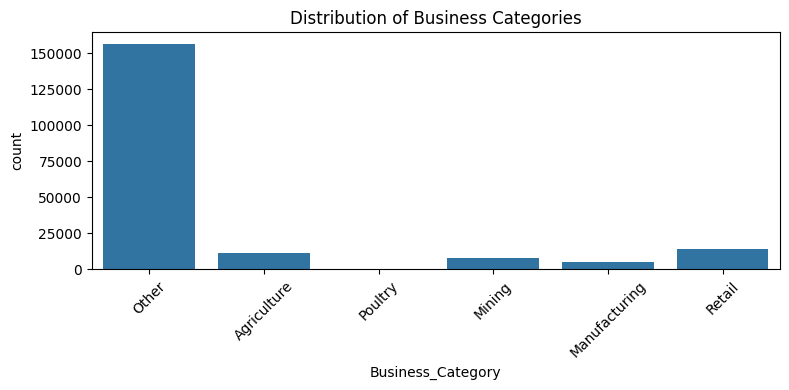

In [ ]:
#Business Category Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x="Business_Category", data=df)
plt.title("Distribution of Business Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

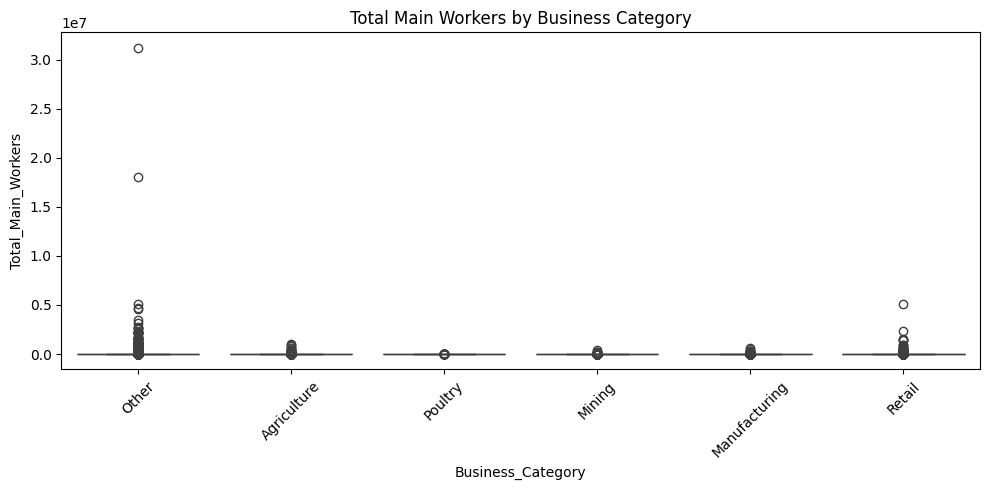

In [ ]:
#Total Mainworkers Category
plt.figure(figsize=(10, 5))
sns.boxplot(x="Business_Category", y="Total_Main_Workers", data=df)
plt.title("Total Main Workers by Business Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

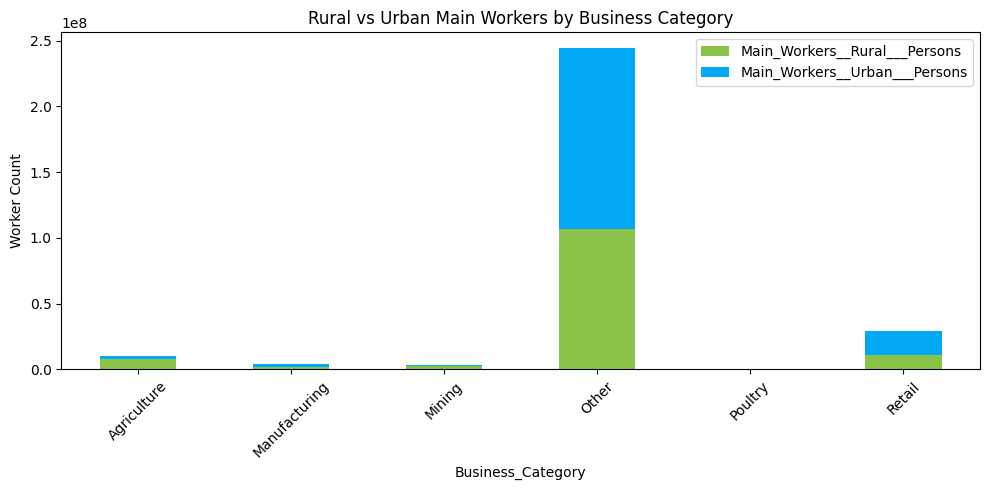

In [ ]:
#rural vs urban workers category
stacked_df = df.groupby("Business_Category")[["Main_Workers__Rural___Persons", "Main_Workers__Urban___Persons"]].sum().reset_index()
stacked_df.set_index("Business_Category").plot(kind="bar", stacked=True, figsize=(10, 5), color=["#8BC34A", "#03A9F4"])
plt.title("Rural vs Urban Main Workers by Business Category")
plt.ylabel("Worker Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

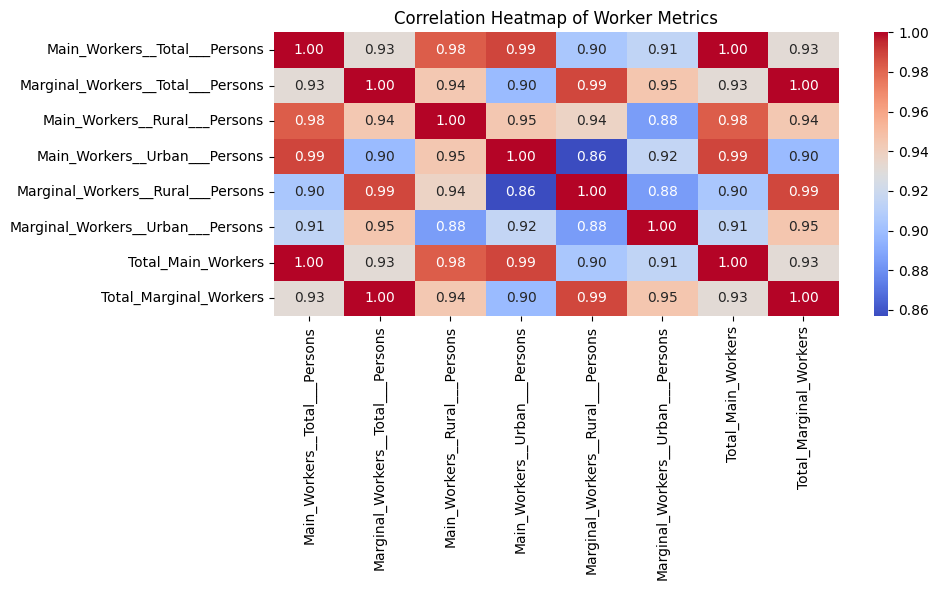

In [ ]:
#corelation heatmap for worker metrics

corr_cols = [
    "Main_Workers__Total___Persons", "Marginal_Workers__Total___Persons",
    "Main_Workers__Rural___Persons", "Main_Workers__Urban___Persons",
    "Marginal_Workers__Rural___Persons", "Marginal_Workers__Urban___Persons",
    "Total_Main_Workers", "Total_Marginal_Workers"
]
plt.figure(figsize=(10, 6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Worker Metrics")
plt.tight_layout()
plt.show()

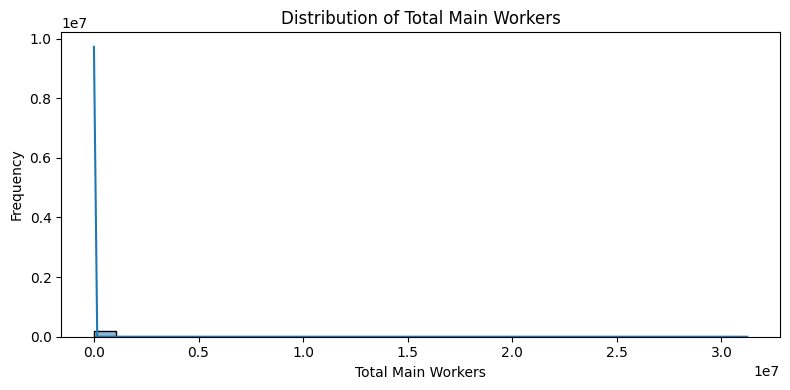

In [ ]:
#Histogram of Main Workers
plt.figure(figsize=(8, 4))
sns.histplot(df["Total_Main_Workers"].dropna(), bins=30, kde=True)
plt.title("Distribution of Total Main Workers")
plt.xlabel("Total Main Workers")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [73]:
model_features = worker_cols + ["Total_Main_Workers", "Total_Marginal_Workers"]
df_model = df[model_features + ["Business_Category"]].dropna()


In [74]:
category_counts = df_model["Business_Category"].value_counts()
valid_categories = category_counts[category_counts >= 2].index
df_model = df_model[df_model["Business_Category"].isin(valid_categories)]



In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib


In [76]:
X = df_model[model_features]
y = df_model["Business_Category"]


In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [78]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
y_pred = clf.predict(X_test)
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



📊 Classification Report:
                precision    recall  f1-score   support

  Agriculture       0.77      0.21      0.34      2259
Manufacturing       0.76      0.27      0.39      1016
       Mining       0.85      0.30      0.45      1526
        Other       0.84      0.99      0.91     31324
      Poultry       0.00      0.00      0.00        67
       Retail       0.71      0.14      0.23      2837

     accuracy                           0.83     39029
    macro avg       0.65      0.32      0.38     39029
 weighted avg       0.82      0.83      0.79     39029

📉 Confusion Matrix:
 [[  484     6    12  1744     1    12]
 [    5   270     2   727     0    12]
 [    9     3   463  1045     0     6]
 [  117    72    65 30940     1   129]
 [    0     0     0    67     0     0]
 [   14     4     5  2429     0   385]]


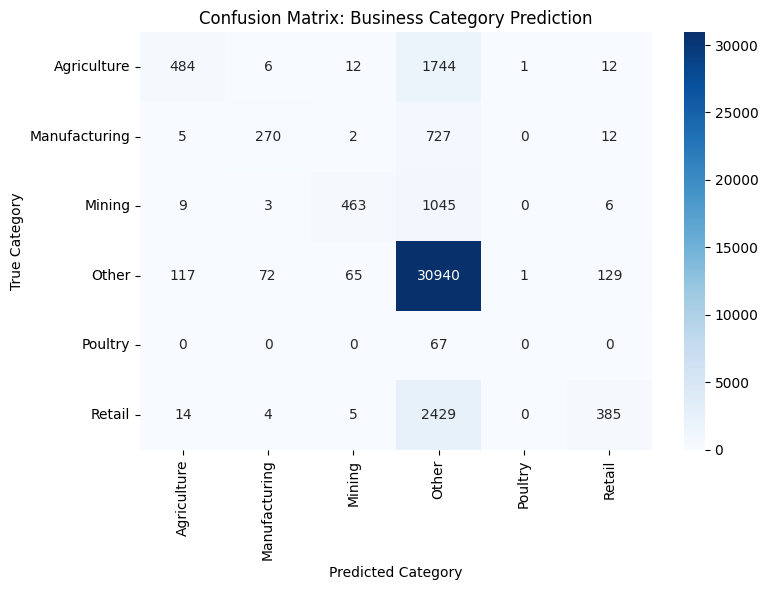

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)
plt.title("Confusion Matrix: Business Category Prediction")
plt.xlabel("Predicted Category")
plt.ylabel("True Category")
plt.tight_layout()
plt.show()


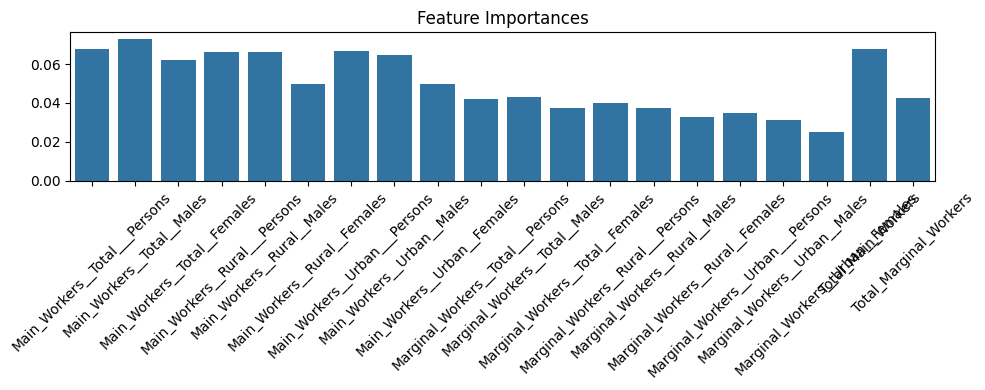

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = clf.feature_importances_
plt.figure(figsize=(10, 4))
sns.barplot(x=model_features, y=importances)
plt.title("Feature Importances")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [81]:
joblib.dump(clf, "industry_classifier.pkl")
print("✅ Model saved as 'industry_classifier.pkl'")


✅ Model saved as 'industry_classifier.pkl'


In [95]:
print(df[["NIC_Name", "Business_Category"]].head(20))

                                             NIC_Name Business_Category
0                                               Total             Other
1   Crop and animal production, hunting and relate...       Agriculture
2                      Growing of non-perennial crops       Agriculture
3   Growing of cereals (except rice), leguminous c...       Agriculture
4                                     Growing of rice             Other
5   Growing of vegetables and melons, roots and tu...             Other
6                              Growing of fibre crops       Agriculture
7                 Growing of other non-perennial crop       Agriculture
8                          Growing of perennial crops       Agriculture
9                           Growing of beverage crops       Agriculture
10  Growing of spices, aromatic, drug and pharmace...       Agriculture
11                   Growing of other perennial crops       Agriculture
12                                  Plant propagation       Agri